<h1>Mis notas: Machine Learning con Scikit-Learn. Ejemplos<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Clasificación-con-Naive-Bayes" data-toc-modified-id="Clasificación-con-Naive-Bayes-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Clasificación con Naive Bayes</a></span><ul class="toc-item"><li><span><a href="#Clasificador-de-Naive-Bayes-Gaussiano" data-toc-modified-id="Clasificador-de-Naive-Bayes-Gaussiano-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Clasificador de Naive Bayes Gaussiano</a></span></li><li><span><a href="#Clasificador-de-Naive-Bayes-Multinomial" data-toc-modified-id="Clasificador-de-Naive-Bayes-Multinomial-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Clasificador de Naive Bayes Multinomial</a></span></li><li><span><a href="#Cuándo-usar-Naive-Bayes" data-toc-modified-id="Cuándo-usar-Naive-Bayes-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Cuándo usar Naive Bayes</a></span></li></ul></li><li><span><a href="#Regresión-lineal" data-toc-modified-id="Regresión-lineal-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Regresión lineal</a></span><ul class="toc-item"><li><span><a href="#Regresión-lineal-simple" data-toc-modified-id="Regresión-lineal-simple-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Regresión lineal simple</a></span></li><li><span><a href="#Regresión-lineal-múltiple" data-toc-modified-id="Regresión-lineal-múltiple-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Regresión lineal múltiple</a></span></li><li><span><a href="#Regresión-con-funciones-base" data-toc-modified-id="Regresión-con-funciones-base-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Regresión con funciones base</a></span><ul class="toc-item"><li><span><a href="#Funciones-base-polinómicas" data-toc-modified-id="Funciones-base-polinómicas-2.3.1"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>Funciones base polinómicas</a></span></li><li><span><a href="#Funciones-base-gaussianas" data-toc-modified-id="Funciones-base-gaussianas-2.3.2"><span class="toc-item-num">2.3.2&nbsp;&nbsp;</span>Funciones base gaussianas</a></span></li><li><span><a href="#Regularización" data-toc-modified-id="Regularización-2.3.3"><span class="toc-item-num">2.3.3&nbsp;&nbsp;</span>Regularización</a></span><ul class="toc-item"><li><span><a href="#Regresión-Ridge-(Regularización-$L_2$)" data-toc-modified-id="Regresión-Ridge-(Regularización-$L_2$)-2.3.3.1"><span class="toc-item-num">2.3.3.1&nbsp;&nbsp;</span>Regresión Ridge (Regularización $L_2$)</a></span></li><li><span><a href="#Regresión-Lasso-(Regularización-$L_1$)" data-toc-modified-id="Regresión-Lasso-(Regularización-$L_1$)-2.3.3.2"><span class="toc-item-num">2.3.3.2&nbsp;&nbsp;</span>Regresión Lasso (Regularización $L_1$)</a></span></li></ul></li></ul></li></ul></li></ul></div>

> **Disclaimer**: Este notebook contiene mis notas sobre implementaciones de algoritmos de Machine Learning con Scikit-Learn, resumiendo básicamente el [capítulo 5](https://jakevdp.github.io/PythonDataScienceHandbook/05.00-machine-learning.html) de [Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/index.html) escrito por [Jake VanderPlas](http://vanderplas.com/). Recomiendo leer la fuente original e ir ejecutando todos los ejemplos (___learn by doing!___).

In [1]:
# Imports
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

## Clasificación con Naive Bayes

Los algoritmos basados en Naive Bayes son bastante sencillos y extremadamente rápidos, por lo que se usan como un buen punto de partida para clasificación.

El Teorema de Bayes nos da la probabilidad de una etiqueta $L_1$ observadas unas caracteristicas $f : (f_1, f_2, ..., f_n)$ como:

> $P(L_1|f)=\frac{P(f|L_1)P(L_1)}{P(f)}$

Si tenemos 2 etiquetas podremos clasificar una observación evaluando el siguiente ratio:

> $\frac{P(L_1|f)}{P(L_2|f)}=\frac{P(f|L_1)P(L_1)}{P(f|L_2)P(L_2)}$

O visto de otra forma, escogeremos la etiqueta $L_i$ que maximice la expresión:

> $P(f|L_i)P(L_i)$

Pero obtener $P(f|L_i)$ no es sencillo. Precisamente Naive bayes asume ciertas cosas para simplificar nuestro clasificador. Dependiendo de la suposición tendremos distintos algoritmos. 

### Clasificador de Naive Bayes Gaussiano

Es la versión más sencilla, en la que asumimos que los datos de cada etiqueta siguen una distribución gaussiana. Vemos un ejemplo de dataset:

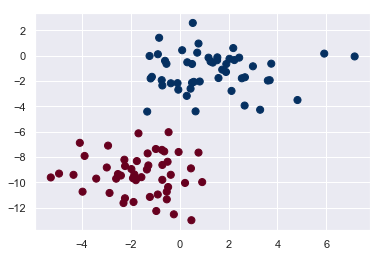

In [2]:
from sklearn.datasets import make_blobs

# Creamos el dataset
X, y = make_blobs(100, 2, centers=2, random_state=2, cluster_std=1.5)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu');

Con la asunción anterior:

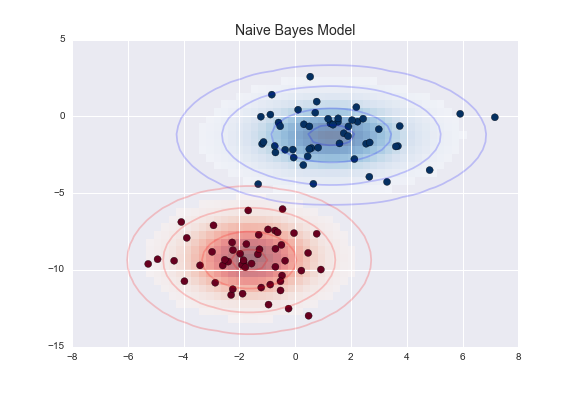

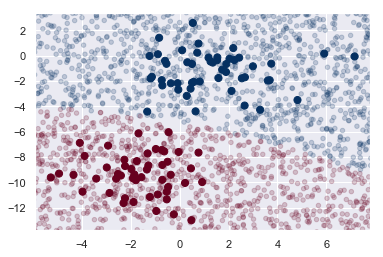

In [3]:
from sklearn.naive_bayes import GaussianNB # Elegimos la clase del modelo
model = GaussianNB()                       # Creamos el modelo, sin parámetros
model.fit(X, y)                            # Entrenamos el modelo con los datos anteriores

# Generamos nuevos datos que clasificaremos usando nuestro modelo
rng = np.random.RandomState(0)
Xnew = [-6, -14] + [14, 18] * rng.rand(2000, 2)

ynew = model.predict(Xnew)                 # Clasificamos las nuevas muestras como 0 o 1

# Pintamos las nuevas muestras con su etiqueta
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
lim = plt.axis()
plt.scatter(Xnew[:, 0], Xnew[:, 1], c=ynew, s=20, cmap='RdBu', alpha=0.2)
plt.axis(lim);

Podemos obtener la probabilidad a posteriori de cada etiqueta para cada observación usando el método `predict_proba()`:

In [4]:
yprob = model.predict_proba(Xnew)
yprob.round(2)

array([[0.  , 1.  ],
       [0.  , 1.  ],
       [0.  , 1.  ],
       ...,
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.15, 0.85]])

### Clasificador de Naive Bayes Multinomial

En este caso se asume que las muestras siguen una simple distribución multinomial, que no es más que una generalización de la distribución binomial para varias categorías. Esta distribución describe la probabilidad de que se dé una combinación concreta del número de casos encuadrados dentro de las distintas categorías para N sucesos. 

Esta asunción será adecuada cuando las características de nuestro dataset representen apariciones o porcentajes de apariciones. Un ejemplo donde se suele usar mucho es en **clasificación de texto**, donde las características hacen referencia al número de apariciones de una palabra o a su frecuencia dentro de documentos.

Vemos un ejemplo con un corpus de documentos pertenecientes a varios grupos de noticias:

In [5]:
from sklearn.datasets import fetch_20newsgroups

data = fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [6]:
# Seleccionamos unas cuantas categorías y creamos los subconjuntos de entrenamiento y de test
categories = ['talk.religion.misc', 'soc.religion.christian', 'sci.space', 'comp.graphics']
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

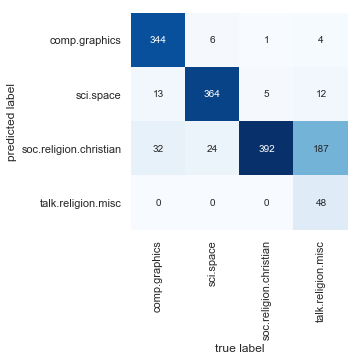

In [7]:
# Convertiremos el contenido de cada texto en un vector de números (feature engineering)
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.naive_bayes import MultinomialNB               # Elegimos la clase para el modelo
from sklearn.pipeline import make_pipeline

model = make_pipeline(TfidfVectorizer(), MultinomialNB())   # Tubería con la vectorización y la instancia del modelo
model.fit(train.data, train.target)                         # Entrenamos el modelo
labels = model.predict(test.data)                           # Predecimos las categorías

# Validación del modelo usando la matriz de confusión
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=train.target_names, yticklabels=train.target_names, cmap='Blues')
plt.xlabel('true label')
plt.ylabel('predicted label');

Para el clasificador fue fácil diferenciar temas distintos, pero se confundió bastante en el caso de los dos grupos que trataban sobre religión.

Podemos predecir la categoría de un nuevo texto:

In [8]:
pred = model.predict(['Jesus was jewish'])
train.target_names[pred[0]]

'soc.religion.christian'

### Cuándo usar Naive Bayes

Ventajas de estos algoritmos:
 * Extremadamente rápidos
 * Predicción probabilística sencilla
 * Por lo general muy fáciles de interpretar
 * Pocos hiperparámetros (o ninguno)

Cuándo usarlos:
 * Para obtener una clasificación que sirva de punto de partida
 * Cuando las asunciones realmente sirvan para los datos (raro en la práctica)
 * Para categorías bien separadas, donde la complejidad es menos importante
 * Para datos con muchas dimensiones, donde la complejidad es menos importante
 
Ojo! más dimensiones implica más posibilidades de que los datos estén mejor separados.

## Regresión lineal

Al igual que Naive Bayes es un buen punto de partida para clasificación, la regresión lineal lo es para el caso de regresión.

### Regresión lineal simple

En el caso más simple de regresión lineal tendremos una recta de la forma:

> $y = ax + b$

donde $a$ es la pendiente y $b$ el offset o punto de intersección con el eje y.

Vemos un ejemplo:

a: 2.027208810360695
b: -4.998577085553202


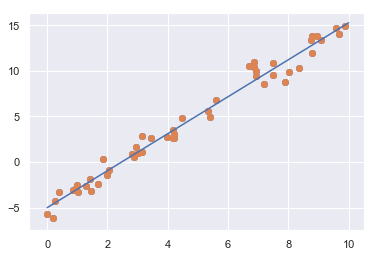

In [9]:
# Datos de entrenamiento
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = 2 * x - 5 + rng.randn(50)
plt.scatter(x, y);

# Modelo
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)
model.fit(x[:, np.newaxis], y)

# Datos de test
xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])

# Coeficientes
print("a:", model.coef_[0])
print("b:", model.intercept_)

# Gráfica
plt.scatter(x, y)
plt.plot(xfit, yfit);

### Regresión lineal múltiple

Podemos usar también el estimador `LinearRegression` para el caso en que tengamos más de dos dimensiones. Por ejemplo, para el caso de 3 dimensiones obtendremos un plano de la forma:

> $y = a_0 + a_1x_1 + a_2x_2$

y así sucesivamente (obteniendo un hiperplano para más de 3 dimensiones). Es más complicado representarlo, pero podemos obtener los coeficientes igual que en el caso de la regresión simple.

### Regresión con funciones base

Aunque la regresión lineal parece restringida a relaciones lineales entre variables, podemos adaptarla para relaciones no lineales transformando los datos con funciones base.

La idea es tomar el modelo lineal multidimensional:

> $y = a_0 + a_1x_1 + a_2x_2 + a_3x_3 + ...$

y crear esas variables a partir de una variable unidimensional $x$; es decir, transformaremos $x_i$ en una función $f_i(x)$.

#### Funciones base polinómicas

Usando funciones del tipo $f_i(x) = x^i$ obtendremos:

> $y = a_0 + a_1x + a_2x^2 + a_3x^3 + ...$

Esta proyección polinomial está incluida en Scikit-Learn, usando el transformador `PolynomialFeatures`. Vemos un ejemplo donde pasamos de una variable unidimensional a un array tridimensional:

In [10]:
from sklearn.preprocessing import PolynomialFeatures
x = np.array([2, 3, 4])
poly = PolynomialFeatures(3, include_bias=False)
poly.fit_transform(x[:, None])

array([[ 2.,  4.,  8.],
       [ 3.,  9., 27.],
       [ 4., 16., 64.]])

Esta nueva versión de los datos puede ser enchufada a una regresión lineal. La mejor forma de hacerlo es mediante una tubería:

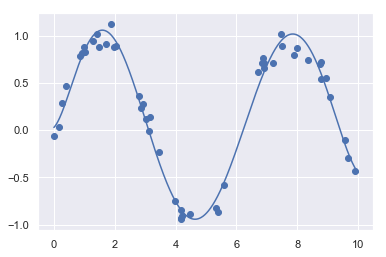

In [11]:
# Tubería: transformación + modelo
poly_model = make_pipeline(PolynomialFeatures(7), LinearRegression()) # polinomio de grado 7

# Dataset
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = np.sin(x) + 0.1 * rng.randn(50)

# Entrenamiento
poly_model.fit(x[:, np.newaxis], y)

# Transformación + Regresión
yfit = poly_model.predict(xfit[:, np.newaxis])

# Gráfica
plt.scatter(x, y)
plt.plot(xfit, yfit);

#### Funciones base gaussianas

Podemos usar otro tipo de funciones que no sean polinómicas. Un ejemplo serían las funciones gaussianas. Este tipo de funciones no está incluido en Scikit-Learn, pero es realmente sencillo de implementar, creando una clase que herede de BaseEstimator y de TransformerMixin.

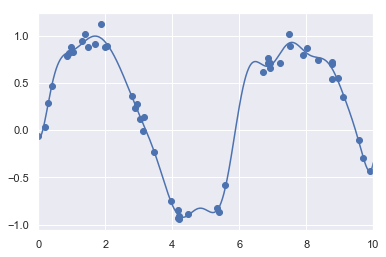

In [12]:
from sklearn.base import BaseEstimator, TransformerMixin

class GaussianFeatures(BaseEstimator, TransformerMixin):
    """Uniformly spaced Gaussian features for one-dimensional input"""
    
    def __init__(self, N, width_factor=2.0):
        self.N = N
        self.width_factor = width_factor
    
    @staticmethod
    def _gauss_basis(x, y, width, axis=None):
        arg = (x - y) / width
        return np.exp(-0.5 * np.sum(arg ** 2, axis))
        
    def fit(self, X, y=None):
        # create N centers spread along the data range
        self.centers_ = np.linspace(X.min(), X.max(), self.N)
        self.width_ = self.width_factor * (self.centers_[1] - self.centers_[0])
        return self
        
    def transform(self, X):
        return self._gauss_basis(X[:, :, np.newaxis], self.centers_, self.width_, axis=1)
    
gauss_model = make_pipeline(GaussianFeatures(20), LinearRegression())
gauss_model.fit(x[:, np.newaxis], y)
yfit = gauss_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit)
plt.xlim(0, 10);

#### Regularización

La introducción de funciones base implica más flexibilidad, pero también el peligro de sobreajuste. Se pueden limitar las oscilaciones extremas de la curva usando lo que se conoce como **regularización**, que no es más que una penalización de valores grandes en los parámetros del modelo.

Si subimos el número de gaussianas veremos el problema:

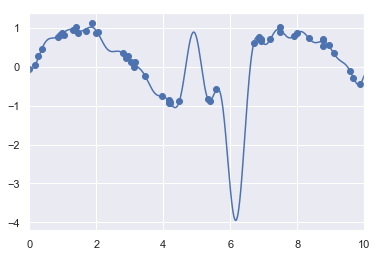

In [13]:
gauss_model = make_pipeline(GaussianFeatures(30), LinearRegression())
gauss_model.fit(x[:, np.newaxis], y)
yfit = gauss_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit)
plt.xlim(0, 10);

##### Regresión Ridge (Regularización $L_2$)

Tenemos disponible esta regularización en la clase `Ridge`. Simplemente tendremos que añadirla en nuestra tubería:

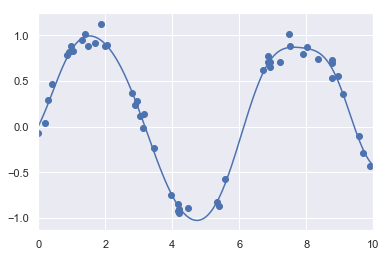

In [14]:
from sklearn.linear_model import Ridge
gauss_model = make_pipeline(GaussianFeatures(30), Ridge(alpha=0.1))
gauss_model.fit(x[:, np.newaxis], y)
yfit = gauss_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit)
plt.xlim(0, 10);

##### Regresión Lasso (Regularización $L_1$)

Igualmente tenemos disponible esta regularización en la clase `Lasso`:

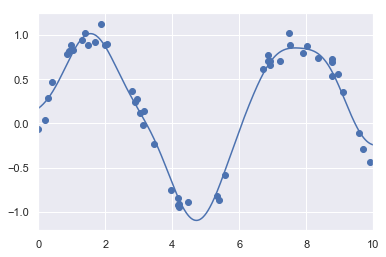

In [15]:
from sklearn.linear_model import Lasso
gauss_model = make_pipeline(GaussianFeatures(30), Lasso(alpha=0.005))
gauss_model.fit(x[:, np.newaxis], y)
yfit = gauss_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit)
plt.xlim(0, 10);